In [50]:
using JLD, PyPlot

In [58]:
archivo="../JLDFiles/TrabajandoKyKTilde/LFP_Promedio_est_bic5.jld"

"../JLDFiles/TrabajandoKyKTilde/LFP_Promedio_est_bic5.jld"

In [59]:
Arxivo=load(archivo)

Dict{String,Any} with 12 entries:
  "KTT_KInv"         => [0.713359 0.155664 … -5.62707e-5 -3.01545e-5; 0.169323 …
  "latencia"         => 27
  "kCSDCorrecta"     => [0.0 -0.303392 … -0.39311 -0.681625; -0.0841553 0.09835…
  "final"            => 1072
  "KTilde"           => [28.1263 33.76 … 1.19496 0.892065; 27.0489 36.982 … 1.2…
  "Canalesrespuesta" => Set(Array{Int64,1}[[19, 36], [33, 57], [26, 34], [23, 3…
  "retrazo"          => 90
  "freq"             => 17.8555
  "LFPSaturados"     => [4125.0 -3.35693 … 7.38525 -5.37109; 0.0 10.0708 … 5.37…
  "Nota"             => "Usamos las siguientes B y BT para obtener las Ks: Bcer…
  "K"                => [7485.65 3871.9 … 1610.64 1579.01; 3871.9 8059.7 … 1641…
  "CanalesSaturados" => Set(Array{Int64,1}[[47, 21], [36, 26], [16, 44], [30, 5…

In [60]:
LFP=Arxivo["LFPSaturados"];

In [61]:
(alto,ancho,tmax)=size(LFP)
retrazo=Arxivo["retrazo"]

90

4022×4022 Array{Float64,2}:
 7485.65  3871.9   3941.41  3974.58  …  1669.43  1640.71  1610.64  1579.01
 3871.9   8059.7   4122.52  4165.36     1700.66  1671.56  1641.1   1609.06
 3941.41  4122.52  8501.15  4320.74     1730.19  1700.73  1669.89  1637.46
 3974.58  4165.36  4320.74  8858.1      1758.3   1728.49  1697.29  1664.48
 3984.22  4176.76  4344.84  4482.51     1785.13  1754.98  1723.42  1690.25
 3976.99  4167.7   4339.83  4491.73  …  1810.73  1780.26  1748.37  1714.84
 3956.76  4143.57  4315.59  4472.64     1835.14  1804.35  1772.13  1738.26
 3924.92  4106.38  4275.6   4433.06     1858.2   1827.12  1794.58  1760.38
 3852.33  4022.46  4183.66  4336.99     1902.4   1870.75  1837.62  1802.78
 3782.97  3942.92  4096.13  4243.89     1945.29  1913.1   1879.39  1843.94
 3747.24  3902.34  4051.48  4196.01  …  1965.82  1933.38  1899.4   1863.66
 3705.87  3855.88  4000.51  4141.1      1984.92  1952.23  1917.99  1881.98
 3625.26  3765.84  3901.88  4034.7      2021.89  1988.75  1954.02  1917.

In [62]:
freq=Arxivo["freq"]
#retrazo=Arxivo["retrazo"]

17.85550205219098

In [85]:
K=Arxivo["K"]
KTilde=Arxivo["KTilde"];
K=K/maximum(K)
KTilde=KTilde/maximum(KTilde);
for j =1:longus
    K[j,j]=K[j,j]/2.0
end

In [86]:
inv(K)

4022×4022 Array{Float64,2}:
  3.92367e7  -9.93401e7   1.61404e8  …  -2.31726e8   6.49209e7   1.68905e7
 -9.93405e7   2.60456e8  -4.34481e8      6.52161e8  -1.93989e8  -3.72056e7
  1.61405e8  -4.34483e8   7.3938e8      -1.1478e9    3.53863e8   5.41028e7
 -1.94447e8   5.29551e8  -9.09724e8      1.43538e9  -4.4794e8   -6.2718e7 
  1.59338e8  -4.35063e8   7.49693e8     -1.18713e9   3.70137e8   5.21848e7
 -6.8405e7    1.85802e8  -3.19471e8  …   4.98072e8  -1.52517e8  -2.44358e7
 -1.43034e7   3.97167e7  -6.91377e7      1.21731e8  -4.07506e7  -2.79725e6
  3.19398e7  -8.68503e7   1.49488e8     -2.43863e8   7.67128e7   1.01016e7
 -4.43748e7   1.2283e8   -2.13973e8      3.52693e8  -1.12684e8  -1.30658e7
  2.15938e8  -5.9736e8    1.03928e9     -1.70565e9   5.45175e8   6.29943e7
 -3.06699e8   8.45543e8  -1.46802e9  …   2.4026e9   -7.64239e8  -9.21337e7
  1.80776e8  -4.96337e8   8.59594e8     -1.40264e9   4.43501e8   5.62435e7
 -1.99005e7   5.35877e7  -9.17794e7      1.51618e8  -4.65908e7  -7.40965

In [ ]:
isposdef(K)

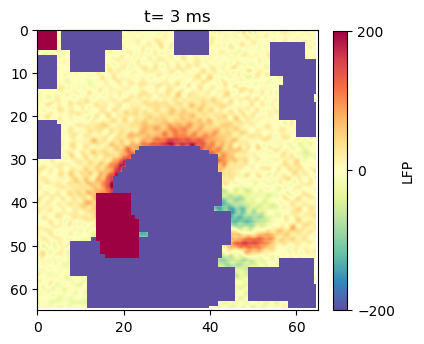

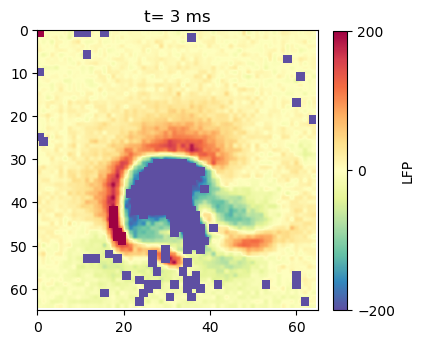

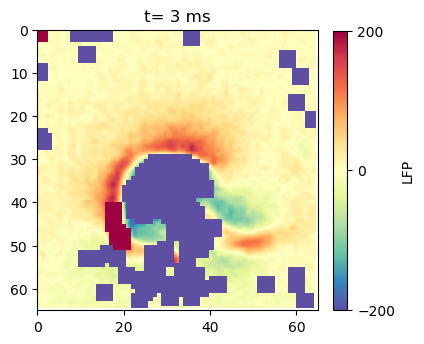

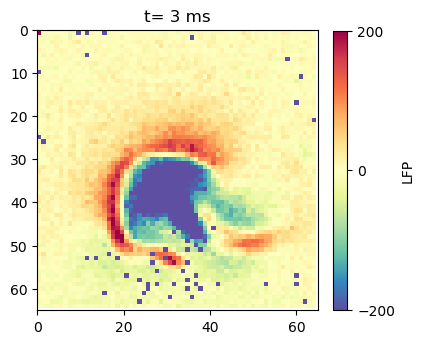

In [9]:
t=150

#ion()
ioff()
lista=("sinc", "hanning", "gaussian", "nearest")
limites=200
 ejemplo=LFP[:,:,t]
for interpol in lista
figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

   
    tiempo=round(Int,(t-retrazo)/freq)

tick_params(
    axis="both",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
   # bottom="off",      # ticks along the bottom edge are off
    top="off",
    right="off",
   # left="off",
# ticks along the top edge are off
   # labelbottom="off",
    labelleft="on")

    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation=interpol,
    cmap="Spectral_r", 
                      vmin=-limites,vmax=limites, extent=[0,64.5,0.5,64.5])

    cbx=colorbar(imagen, fraction=0.045, ticks=[-limites,0,limites]) 

cbx[:set_label]("LFP")
end

In [67]:
det(K)

Inf

### Estabilización de K

In [12]:
addprocs(10);

In [34]:
rmprocs(13:21)

Task (done) @0x00007f60058a9cf0

In [41]:
KTT=0
KTTaux=0

0

In [88]:
longus=size(K,1)
lmax=10
#KTTaux=SharedArray{Float64,3}(longus,longus,lmax);
#@sync @parallel for l=1:lmax
KTTaux=zeros(longus,longus,lmax)
for l=1:lmax
    λ=0.2*l/lmax
    Kdc=deepcopy(K)
    for j in 1:longus
        Kdc[:,:]=Kdc[j,j]*(1+λ)
    end
    println(det(Kdc))
    println(isposdef(Kdc))
    println("esta es lambda, ", λ)
    fu=inv(Kdc)
    println("hola fu")
    fa=transpose(KTilde)
    println(fa)
    KTTaux[:,:,l]=fa*fu
    println("tuabuela")
end
KTT=copy(KTTaux)

0.0
false
esta es lambda, 0.02


LoadError: [91mBase.LinAlg.SingularException(2)[39m

In [35]:
nprocs()

9

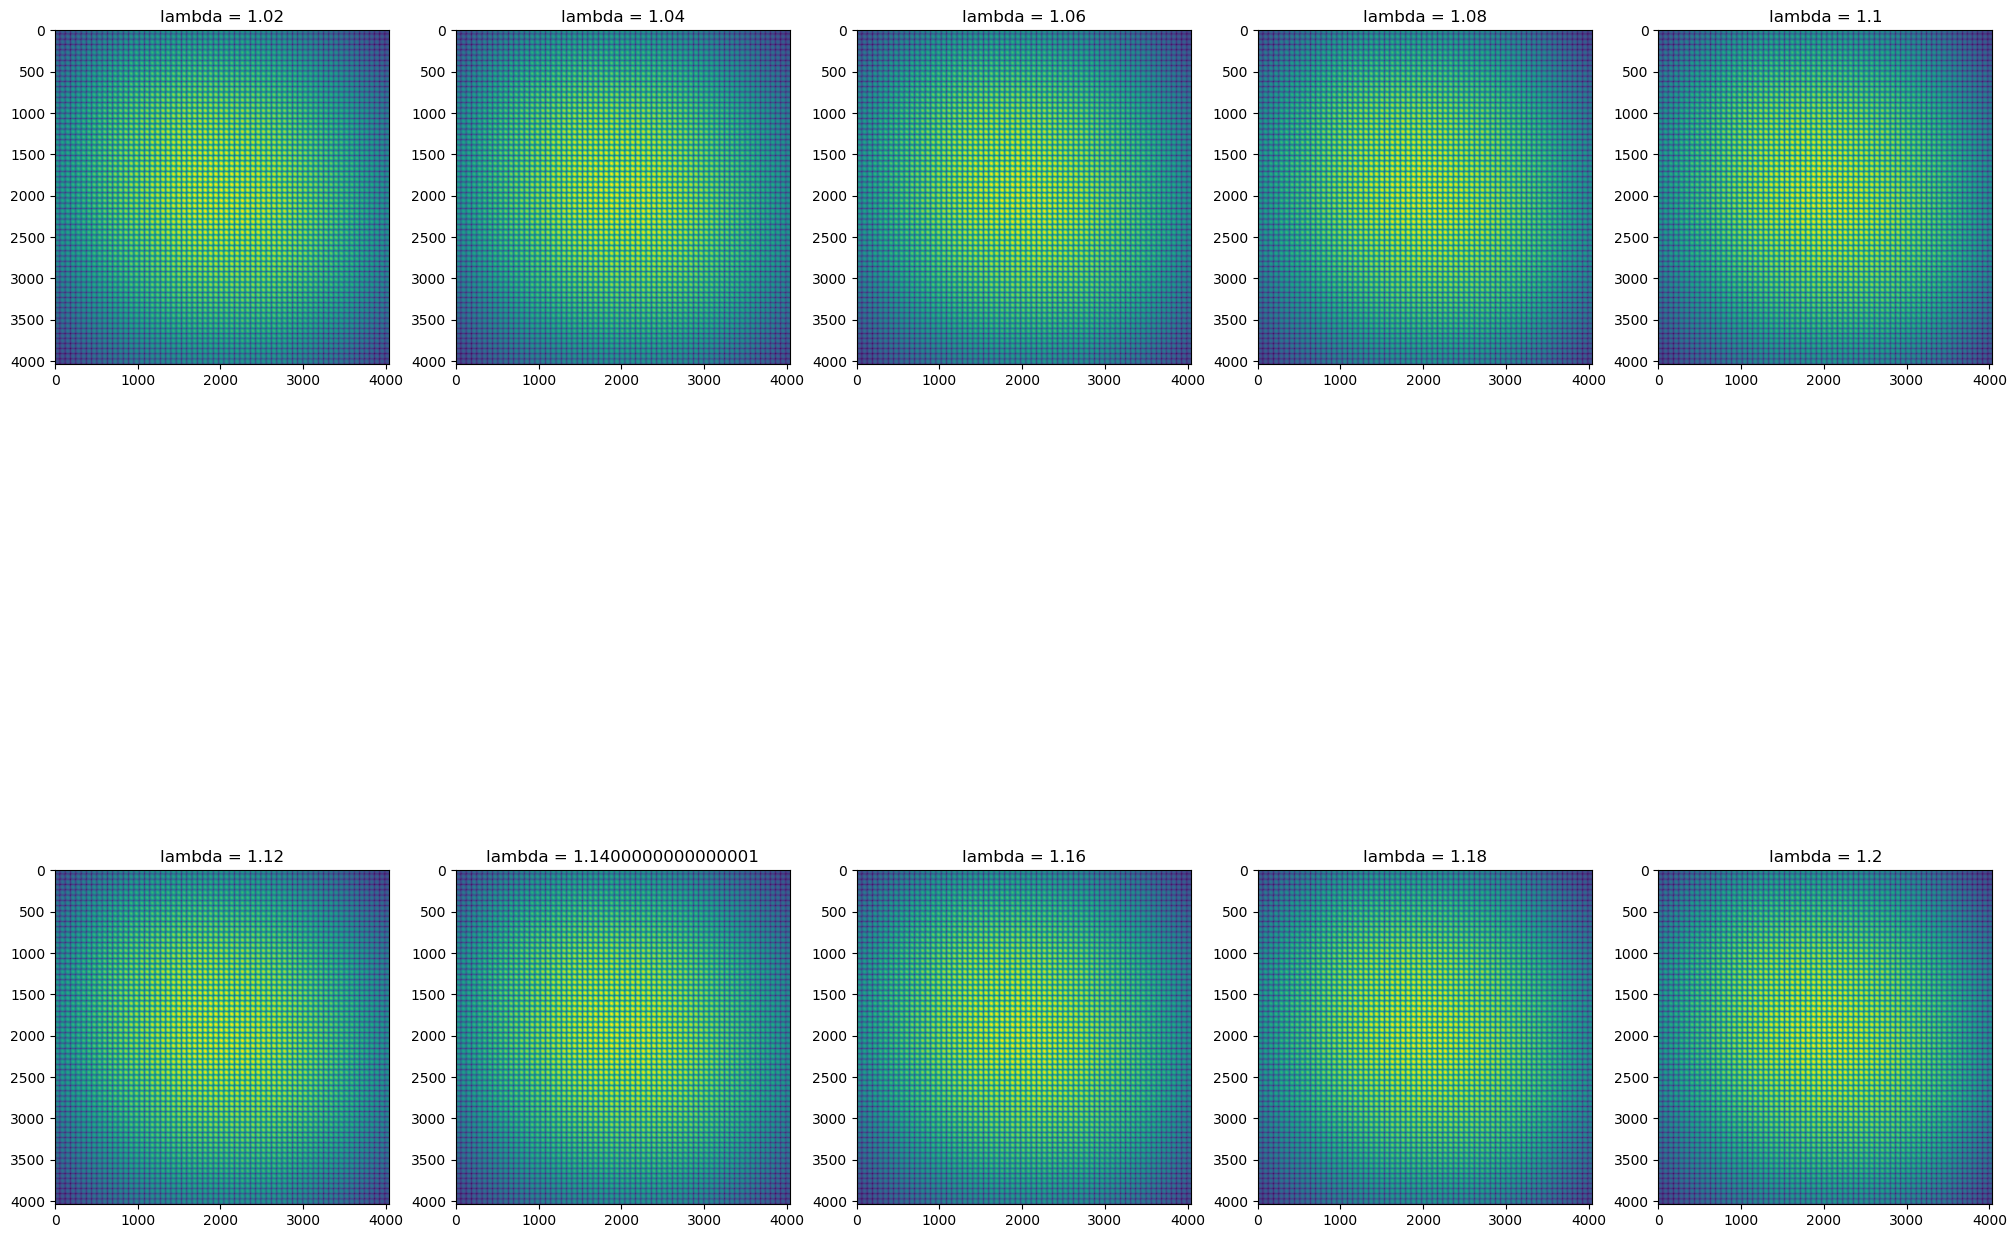

In [37]:
farofa, lista=subplots(2,5, figsize=(25,20))
vlim=40
intervalo=0.2
for l=1:lmax
    pu=ceil(Int,l/5)
    pa=mod(l,5)
    reallambda=(1+intervalo*l/lmax)
    if pa==0; pa=5;end
   # println(pa,", ",pu)
    lista[pu,pa][:imshow](KTT[:,:,l],cmap="viridis")
    lista[pu,pa][:set_title]("lambda = $reallambda")
end
#savefig("VarioskCSD03.png",dpi=92)

In [23]:
saturados=Arxivo["CanalesSaturados"]

Set(Array{Int64,1}[[51, 30], [17, 60], [57, 37], [52, 17], [59, 26], [7, 58], [46, 41], [57, 60], [56, 28], [62, 36]  …  [56, 34], [59, 42], [59, 60], [58, 24], [53, 30], [1, 12], [60, 26], [46, 36], [59, 32], [50, 37]])

In [38]:
todaslasX=Array[]

ncuad=64
Ntot=ncuad^2

for j=1:ncuad,k=1:ncuad
    push!(todaslasX,[j,k])
end

xpurgadas=filter(q->!(q in saturados), todaslasX)
nbuenas=length(xpurgadas)

lfpv=zeros(nbuenas)

println("Acomodando los LFP correctos")

println("nbuenas", nbuenas)

for j=1:nbuenas
    
    renglon=xpurgadas[j][1]
    columna=xpurgadas[j][2]
    lfpv[j]=ejemplo[renglon,columna]
end


Acomodando los LFP correctos
nbuenas4038


In [39]:
CSD=zeros(64,64,lmax)

for l in 1:lmax
    CSDTentativa=KTT[:,:,l]*lfpv 

    for j=1:nbuenas
        renglon=xpurgadas[j][1]
        columna=xpurgadas[j][2]
        CSD[renglon,columna,l]=CSDTentativa[j]
    end
end
println("terminando calculo")
#writedlm("EjemplitokCSD.dat",CSD)

terminando calculo


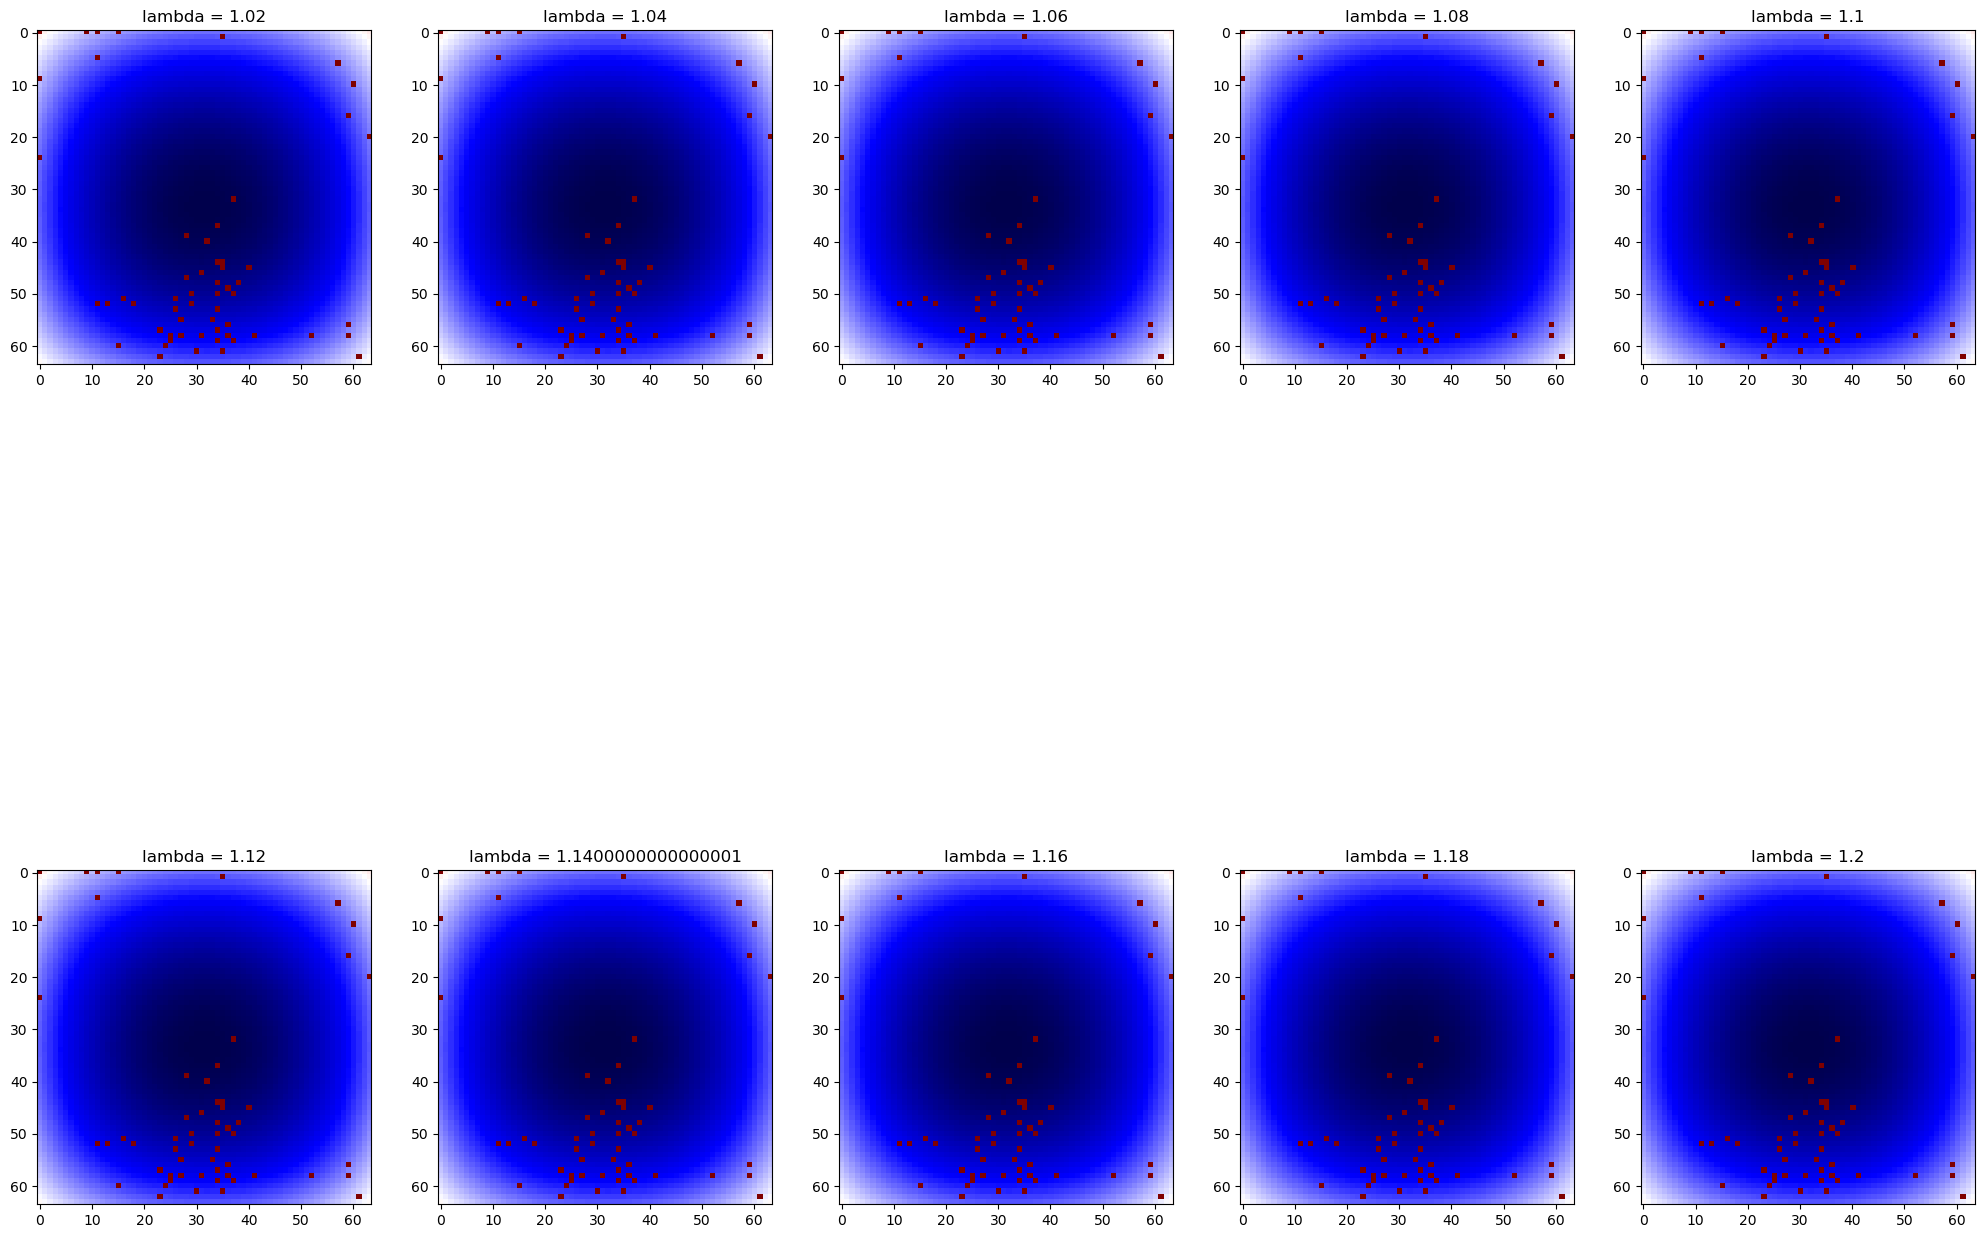

In [40]:
farofa, lista=subplots(2,5, figsize=(25,20))
vlim=40
intervalo=0.2
for l=1:lmax
    pu=ceil(Int,l/5)
    pa=mod(l,5)
    reallambda=(1+intervalo*l/lmax)
    if pa==0; pa=5;end
   # println(pa,", ",pu)
    lista[pu,pa][:imshow](CSD[:,:,l],cmap="seismic")
    lista[pu,pa][:set_title]("lambda = $reallambda")
end
savefig("VarioskCSD03.png",dpi=92)